# **Exploring Convolutional Neural Networks**

In this notebook, we will explore some of the basic tools for regularization and hyper-parameter tuning for neural networks.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization, Dropout

from tensorflow.keras import regularizers

from keras.optimizers import SGD, Adam, RMSprop

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

## Load and Splitting Data

We Will make use of the CIFAR10 dataset.

In [ ]:
# Loading train and test dataset
(trainingX, trainingY), (testX, testY) = cifar10.load_data()
labels = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

# Keeping 20% for Validation
valid_set_pc = 0.2
split= int((len(trainingX))*(1-valid_set_pc))

validX = trainingX[split:]
validY = trainingY[split:]

trainX = trainingX[:split]
trainY = trainingY[:split]

170508288/170498071 [==============================] - 6s 0us/step


ship


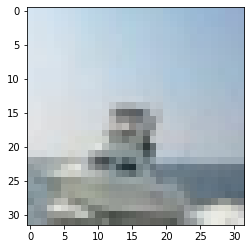

In [ ]:
# Showing a samples from the dataset
sampleID = 100
plt.imshow(trainX[sampleID])
print(labels[trainY[sampleID][0]])

In [ ]:
# Convert from integers to floats
trainingX = trainingX.astype('float32')
trainX = trainX.astype('float32')
validX = validX.astype('float32')
testX  = testX.astype('float32')

# Normalize to range 0-1
trainingX = trainingX / 255.0
trainX = trainX / 255.0
validX = validX / 255.0
testX  = testX / 255.0

# One-hot encoding of outputs
trainingY = to_categorical(trainingY)
trainY = to_categorical(trainY)
validY = to_categorical(validY)
testY  = to_categorical(testY)

## Training a Base CNN Model

In [ ]:
# Defining Base CNN Model
def define_base_model():
	model = Sequential()
 
	model.add(Conv2D(256, (3, 3), activation='relu',  padding='same', input_shape=(32, 32, 3)))
	model.add(MaxPooling2D((2, 2)))
 
	model.add(Conv2D(256, (3, 3), activation='relu',  padding='same'))
	model.add(MaxPooling2D((2, 2)))
 
	model.add(Conv2D(256, (3, 3), activation='relu',  padding='same'))
	model.add(MaxPooling2D((2, 2)))
 
	model.add(Flatten())
	model.add(Dense(1024, activation='relu'))
	model.add(Dense(10, activation='softmax'))
 
	return model

# Creating an instance
base_model = define_base_model()
base_model.summary()
base_model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [ ]:
# Training base model
base_history = base_model.fit(trainX, trainY, epochs=15, validation_data=(validX, validY), verbose=1)

Epoch 1/15
1250/1250 [==============================] - 44s 9ms/step - loss: 2.1812 - accuracy: 0.1918 - val_loss: 1.8092 - val_accuracy: 0.3575
Epoch 2/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.7365 - accuracy: 0.3779 - val_loss: 1.5525 - val_accuracy: 0.4397
Epoch 3/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5171 - accuracy: 0.4552 - val_loss: 1.4690 - val_accuracy: 0.4783
Epoch 4/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.3748 - accuracy: 0.5119 - val_loss: 1.3202 - val_accuracy: 0.5310
Epoch 5/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.2650 - accuracy: 0.5502 - val_loss: 1.2871 - val_accuracy: 0.5423
Epoch 6/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1681 - accuracy: 0.5895 - val_loss: 1.1560 - val_accuracy: 0.5944
Epoch 7/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0868 - accuracy: 0.6155 - val_loss: 1.0956 - val_ac

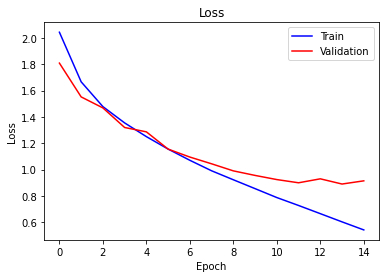

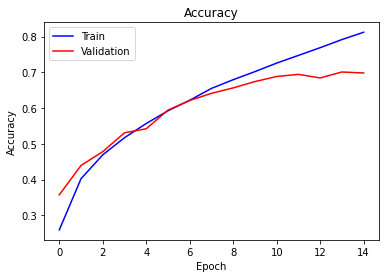

In [ ]:
# Defining a function for plotting training and validation learning curves
def plot_history(history):
	  # plot loss
    plt.title('Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='red', label='test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    
    # plot accuracy
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='red', label='test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
  
plot_history(base_history)

# **[Task 1] Comparing Optimizers**

The goal of of this section is to compare the performance of various optimizers: SGD with momentum, RMS Prop and Adam. Make sure you complete the following steps:

1. Train the network with SGB with momentum
2. Train the network with RMS Prop
3. Train the network with Adam
4. Create two plots showing accuracy for the training and validation sets
5. Comment on the performance of each optimizer. Which one had the steepest learning curve? Which one gave the final best performance? 




In [ ]:
# TODO - Training model with momentum 
sgd_model = define_base_model()
sgd_model.summary()
sgd_model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

sgd_history = sgd_model.fit(trainX, trainY, epochs=15, validation_data=(validX, validY), verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 256)       7168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 256)         590080    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

In [ ]:
# TODO - Training model with RMS Prop
rms_model = define_base_model()
rms_model.summary()
rms_model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# Training base model
rms_history = rms_model.fit(trainX, trainY, epochs=15, validation_data=(validX, validY), verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 256)       7168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 256)         590080    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [ ]:
# TODO - Training model with Adam
adam_model = define_base_model()
adam_model.summary()
adam_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Training base model
adam_history = adam_model.fit(trainX, trainY, epochs=15, validation_data=(validX, validY), verbose=1)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 256)       7168      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 256)         590080    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

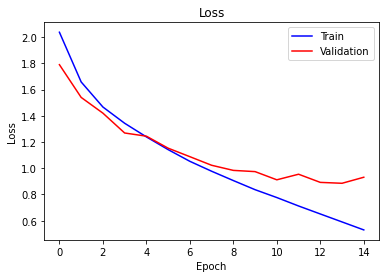

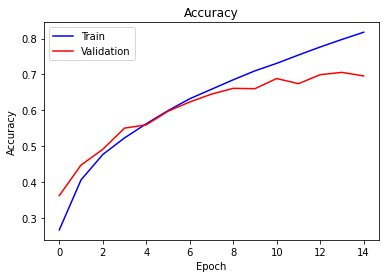

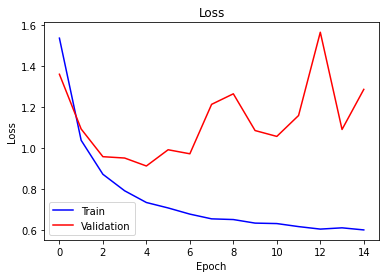

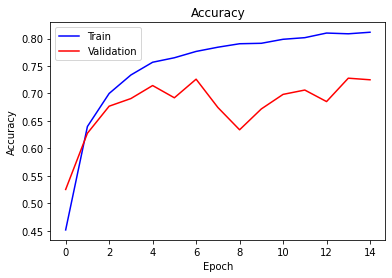

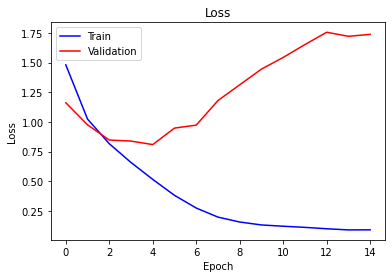

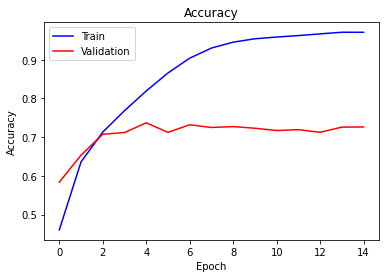

In [ ]:
# TODO - Plotting training accuracy
plot_history(sgd_history)
plot_history(rms_history)
plot_history(adam_history)


[TODO - Add your observations]
Observing the training accuracy with the three different optimizers, I was able to observe that the Adam optimizer had the highest taining accuracy with 15 epochs with an accuracy above 90%. The next best optimizer was the RMSprops optimizer as it was able to achieve an above 80% accruacy after 15 epochs. The worst optimizer out of the three was the SGD with momentum as it took exactly 15 epochs before it was able to achieve and 80% training accuracy.



# **[Task 2] Applying Standard Regularization**

The goal of this section is to compare the effect of different normalization approaches including Batch normalization and Dropout. Make sure to complete the following steps:

1. Create a new model by adding a batch normalization layer after each convolutional layer and between the dense layers of the base model. Train it using the Adam optimizer.
2. Create a new model by adding dropout after each convolutional layer and between the dense layers of the base model with a rate equal to $0.2$. Train it using the Adam optimizer.
3. Create two plots showing accuracy for the training and validation sets comparing the regularized versions against the base model trained with the Adam optimizer.
4. Comment on the performance of each model. Which one had the steepest learning curve? Which one gave the final best performance? 




In [ ]:
# TODO - Defining Batch Normalization model and training it
norm_model = Sequential()
 
norm_model.add(Conv2D(256, (3, 3), activation='relu',  padding='same', input_shape=(32, 32, 3)))
norm_model.add(BatchNormalization())
norm_model.add(MaxPooling2D((2, 2)))
 
norm_model.add(Conv2D(256, (3, 3), activation='relu',  padding='same'))
norm_model.add(BatchNormalization())
norm_model.add(MaxPooling2D((2, 2)))
 
norm_model.add(Conv2D(256, (3, 3), activation='relu',  padding='same'))
norm_model.add(BatchNormalization())
norm_model.add(MaxPooling2D((2, 2)))
 
norm_model.add(Flatten())
norm_model.add(Dense(1024, activation='relu'))
norm_model.add(BatchNormalization())
norm_model.add(Dense(10, activation='softmax'))

norm_model.summary()
norm_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Training normal model
norm_history = norm_model.fit(trainX, trainY, epochs=15, validation_data=(validX, validY), verbose=1)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 256)       7168      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 256)       1024      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 256)       590080    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         5

In [ ]:
# TODO - Defining dropout regularized model and training it
Dropout
drop_model = Sequential()
 
drop_model.add(Conv2D(256, (3, 3), activation='relu',  padding='same', input_shape=(32, 32, 3)))
drop_model.add(Dropout(0.2))
drop_model.add(MaxPooling2D((2, 2)))
 
drop_model.add(Conv2D(256, (3, 3), activation='relu',  padding='same'))
drop_model.add(Dropout(0.2))
drop_model.add(MaxPooling2D((2, 2)))
 
drop_model.add(Conv2D(256, (3, 3), activation='relu',  padding='same'))
drop_model.add(Dropout(0.2))
drop_model.add(MaxPooling2D((2, 2)))
 
drop_model.add(Flatten())
drop_model.add(Dense(1024, activation='relu'))
drop_model.add(Dropout(0.2))
drop_model.add(Dense(10, activation='softmax'))

drop_model.summary()
drop_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Training normal model
drop_history = drop_model.fit(trainX, trainY, epochs=15, validation_data=(validX, validY), verbose=1)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 256)       7168      
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 256)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 256)       590080    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 256)        

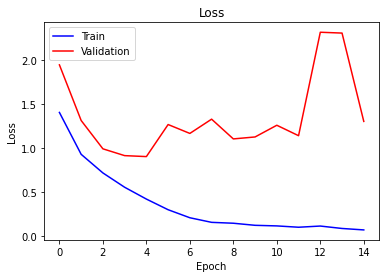

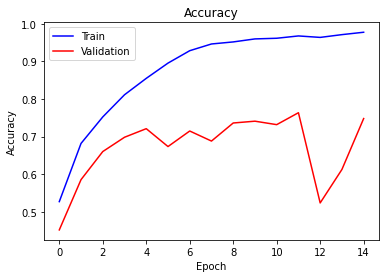

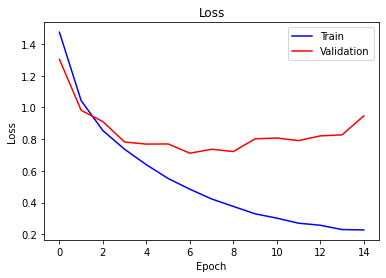

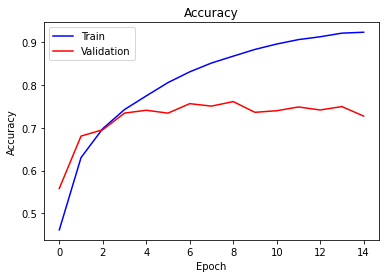

In [ ]:
# TODO - Plotting training accuracy
plot_history(norm_history)
plot_history(drop_history)

[TODO - Add your observations]
Comparing the two models, the model that had the steeper learning curve was the batch normalization model as it was able to achieve a 90% accuracy by the 6th epoch. The dropout model was able to achieve a 90% accuracy but it did not occur till the 11th epoch. The model that scored the highest accuracy was the batch normalization model with an accuracy score of 97.79%.

# **[Task 3] Hyperparameter Tuning**

The objective of this section is to perform hyperparameter tuning of the network using a grid search. Make sure to complete these steps:

1. Perform a grid search for the optimal hyperparameters for the model with dropout regularization and Adam optimizer using the dropout values [0.1, 0.2, 0.3] and the learning rate values [0.1, 0.01, 0.001].
2. Display the results for the best model on the test dataset.

In [ ]:
# TODO - Defining final model for optimization
def create_model(learn_rate = 0.1, momentum =0.2):
  final_model = Sequential()
  
  final_model.add(Conv2D(256, (3, 3), activation='relu',  padding='same', input_shape=(32, 32, 3)))
  final_model.add(Dropout(momentum))
  final_model.add(MaxPooling2D((2, 2)))
  
  final_model.add(Conv2D(256, (3, 3), activation='relu',  padding='same'))
  final_model.add(Dropout(momentum))
  final_model.add(MaxPooling2D((2, 2)))
  
  final_model.add(Conv2D(256, (3, 3), activation='relu',  padding='same'))
  final_model.add(Dropout(momentum))
  final_model.add(MaxPooling2D((2, 2)))
  
  final_model.add(Flatten())
  final_model.add(Dense(1024, activation='relu'))
  final_model.add(Dropout(momentum))
  final_model.add(Dense(10, activation='softmax'))

  final_model.summary()
  final_model.compile(optimizer=Adam(learning_rate = learn_rate), loss='categorical_crossentropy', metrics=['accuracy'])
  return final_model

momentum = [0.1, 0.2, 0.3]
learn_rate = [0.1, 0.01, 0.001]

param_grid = dict(learn_rate=learn_rate, momentum=momentum)
keras_model = KerasClassifier(build_fn=create_model, epochs=15,verbose=1)
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3)
grid_result = grid.fit(trainX, trainY)




Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 256)       7168      
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 256)       0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 256)       590080    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 256)       0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 256)        

In [ ]:
# TODO - Displaying best parameters found
print("The parameters with the best score are: %s" % grid_result.best_params_)


The parameters with the best score are: {'learn_rate': 0.001, 'momentum': 0.1}
